In [3]:
#Loading diabetes data provided by sklearn.
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [27]:
#import data in Pandas and separates features (X) from outcomes (y).
import pandas as pd
X = pd.DataFrame(diabetes.data, columns= diabetes.feature_names) 
y = pd.DataFrame(diabetes.target, columns=["glycemia"])

In [28]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [29]:
y.head()

,glycemia
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [30]:
X.shape

(442, 10)

In [31]:
#Creating tuning and validation data
from sklearn.model_selection import train_test_split

X_tuning, X_val, y_tuning, y_val = train_test_split(X, y, test_size=0.33, random_state=1, shuffle=True)

In [9]:
X_tuning.shape

(296, 10)

In [32]:
#K-fold cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits = 20, shuffle=True, random_state=0)
kf.get_n_splits(X_tuning)+

20

In [34]:
#Standardisation of features
#Polynomial transformation of features (degree equal to 2)
#OLS regression on the transformed feature space
from sklearn.preprocessing import StandardScaler # Library to standardise data
from sklearn.linear_model import LinearRegression # Library to use OLS Regression
from sklearn.preprocessing import PolynomialFeatures # Library to generate polynomial features
from sklearn.pipeline import Pipeline # Library to create a pipeline

import numpy as np 

# Empty vectors of scores
R2_train = []
R2_test = []

# K-fold validation
for train_index, test_index in kf.split(X_tuning):

    # Splitting data into train-test
    X_train, X_test = X_tuning.iloc[train_index], X_tuning.iloc[test_index]
    y_train, y_test = y_tuning.iloc[train_index], y_tuning.iloc[test_index]
    
    # Standardising outcome data
    scaler = StandardScaler()
    scaler.fit(y_train)
    y_train = scaler.transform(y_train) 
    y_test = scaler.transform(y_test)

    # Building a pipeline
    pipe = Pipeline([('scaler', StandardScaler()), # scaling features
                     ('poly', PolynomialFeatures(2)), # polynomial features
                     ('lm', LinearRegression())]) # training a linear regression model  
        
    # Implementing our pipe
    pipe.fit(X_train, y_train)
    
    # Use the trained model to create predictions on train and test data
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    # Computing the accuracy of each model
    R2_score_train = pipe.score(X_train, y_train)
    R2_score_test = pipe.score(X_test, y_test)
    
    # Updating the vector of accuracies
    R2_train.append( R2_score_train )
    R2_test.append( R2_score_test )
    
print("Mean R2 on train:", np.mean( R2_train ))
print("Mean R2 on test:", np.mean( R2_test ))

Mean R2 on train: 0.6423241705328512
Mean R2 on test: 0.2489627075413321


In [12]:
#tunes Lasso regression by using k-fold cross validation.
from sklearn.linear_model import Lasso # Library to use Lasso Regression

R2s_train = [] # Empty array 
R2s_test = [] # Empty array 
alphas = np.logspace(-4, 1, 100) # Creates an arrays of alphas

# Trying all alphas
for a in alphas:
    R2_train = [] # Empty array
    R2_test = [] # Empty array
    
    # Standardising outcome data
    scaler = StandardScaler()
    scaler.fit(y_train)
    y_train = scaler.transform(y_train) 
    y_test = scaler.transform(y_test)

    # For each alpha, perform k-fold cross validation
    for train_index, test_index in kf.split(X_tuning):
        X_train, X_test = X_tuning.iloc[train_index], X_tuning.iloc[test_index]
        y_train, y_test = y_tuning.iloc[train_index], y_tuning.iloc[test_index]
    
        # Pipeline on feature data
        pipe = Pipeline([('scaler', StandardScaler()), # scaling feature data
                         ('poly', PolynomialFeatures(2)), # polynomial features
                         ('lm', Lasso(alpha = a, tol=1e-1))]) # training a Lasso regression model    
    
        # Fitting our pipeline on train data
        pipe.fit(X_train, y_train)
        
        # Updating the vector of accuracies for a single fold
        R2_train.append( pipe.score(X_train, y_train) )
        R2_test.append( pipe.score(X_test, y_test) )

    # Updating the vector of accuracies for a specific alpha value
    R2s_train.append( np.mean(R2_train) )
    R2s_test.append( np.mean(R2_test) )

C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258664.54134834715, tolerance: 146266.06440677968
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270013.23404620803, tolerance: 159030.094514768
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231980.6232811686, tolerance: 142623.16455696206
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256967.6463422278, tolerance: 146266.06440677968
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268560.7491849853, tolerance: 159030.094514768
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228911.5161846487, tolerance: 142623.16455696206
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246330.1511110795, tolerance: 148102.94514767933
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275259.1654300376, tolerance: 155916.92236286923
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253624.59475956706, tolerance: 146266.06440677968
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212528.66198460417, tolerance: 142623.16455696206
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242823.81158231443, tolerance: 148102.94514767933
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270160.9140955231, tolerance: 155916.92236286923
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237676.7897448738, tolerance: 146266.06440677968
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250430.9418988928, tolerance: 159030.094514768
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188098.17604797473, tolerance: 142623.16455696206
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242592.151636478, tolerance: 155916.92236286923
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218319.33685972032, tolerance: 146266.06440677968
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228579.5296967305, tolerance: 159030.094514768
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178581.79408179264, tolerance: 159030.094514768
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181361.88487288816, tolerance: 148102.94514767933
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176836.90077512458, tolerance: 155916.92236286923
  model = cd_fast.enet_coordinate_descent(
C:\Users\IT SUPPORT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

accuracies = pd.DataFrame({"alpha": alphas,
                           "R2_train": R2s_train,
                           "R2_test": R2s_test})
accuracies.head()

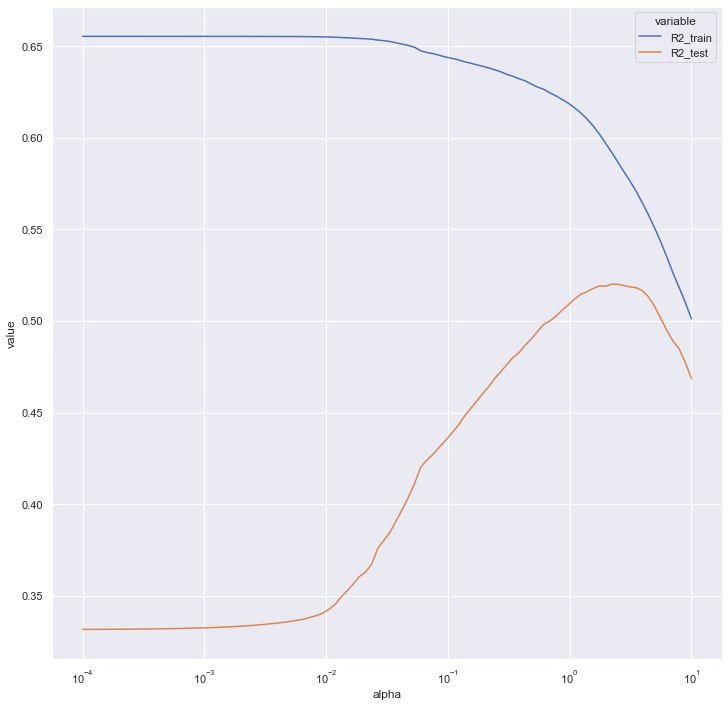

In [36]:
import seaborn as sb

sb.set(rc={'figure.figsize':(12,12)})
plot = sb.lineplot(data = pd.melt(accuracies, id_vars=['alpha'], value_vars=['R2_train', 'R2_test']),
                   x="alpha", y="value", hue="variable")
plot.set_xscale('log')

In [16]:
# Printing the tuned alpha value

tunedAlpha = alphas[np.argmax(R2s_test)]
print("tuned alpha:", tunedAlpha)

tuned alpha: 2.477076355991709


In [17]:
#Validating the Lasso model
from sklearn.metrics import mean_squared_error # Library to assess the accuracy of a regression model

# Building a pipeline
pipe = Pipeline([('scaler', StandardScaler()), # scaling features
                 ('poly', PolynomialFeatures(3)), # polynomial features
                 ('lm', Lasso(alpha = tunedAlpha, tol=1e-1))]) # training a linear regression model 

pipe.fit(X_tuning, y_tuning)

y_tuning_pred = pipe.predict(X_tuning)
y_val_pred = pipe.predict(X_val)

# Accuracy scores
MSE_tuning = mean_squared_error(y_tuning_pred, y_tuning)
MSE_val = mean_squared_error(y_val_pred, y_val)
R2_tuning = pipe.score(X_tuning, y_tuning) 
R2_val = pipe.score(X_val, y_val)

print("MSE on tuning data:", MSE_tuning)
print("MSE on validation data:", MSE_val)
print(" --- ")
print("R2 on tuning data:", R2_tuning)
print("R2 on validation data:", R2_val)

MSE on tuning data: 2439.4119265691334
MSE on validation data: 3200.438873926247
 --- 
R2 on tuning data: 0.6162705998132194
R2 on validation data: 0.3609564300827539


In [37]:
validation = pd.DataFrame({"actual": y_val.glycemia.values, "fitted": y_val_pred})
validation["residuals"] = validation.actual - validation.fitted
validation.describe()

,actual,fitted,residuals
count,146.000000,146.000000,146.000000
mean,146.034247,145.285953,0.748294
std,71.012035,52.468540,56.762197
min,39.000000,49.099976,-135.769905
25%,90.250000,108.071846,-36.591048
50%,134.500000,136.732114,-12.239292
75%,198.250000,177.447461,27.453815
max,346.000000,315.888851,156.590248


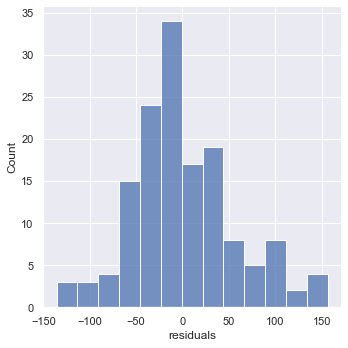

In [38]:
sb.set(rc={'figure.figsize':(4,3)})
sb.displot(validation, x="residuals")

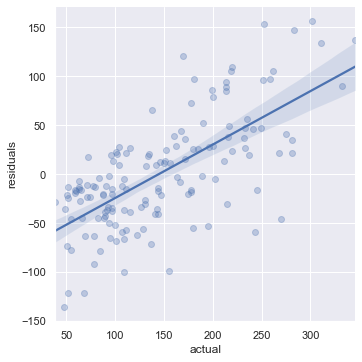

In [39]:
sb.set(rc={'figure.figsize':(4,3)})
sb.lmplot(data=validation, x="actual", y="residuals", scatter_kws={'alpha':0.3})

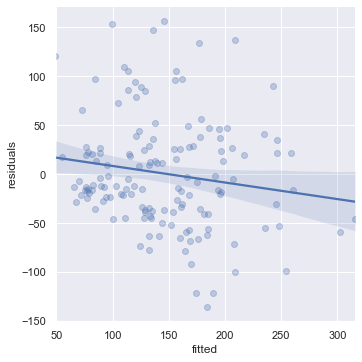

In [40]:
sb.set(rc={'figure.figsize':(4,3)})
sb.lmplot(data=validation, x="fitted", y="residuals", scatter_kws={'alpha':0.3})

In [41]:
X_tuning.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.157979,0.202320,0.335849,0.244892,0.198084,-0.102029,0.212500,0.301272,0.279406
sex,0.157979,1.000000,0.101710,0.279093,0.014931,0.112340,-0.367458,0.320002,0.137502,0.214269
bmi,0.202320,0.101710,1.000000,0.435027,0.218395,0.221136,-0.398436,0.418113,0.474898,0.397809
bp,0.335849,0.279093,0.435027,1.000000,0.239241,0.186470,-0.217013,0.290888,0.410787,0.416892
s1,0.244892,0.014931,0.218395,0.239241,1.000000,0.901227,0.075978,0.535880,0.520298,0.313126
s2,0.198084,0.112340,0.221136,0.186470,0.901227,1.000000,-0.143879,0.633691,0.316978,0.271955
s3,-0.102029,-0.367458,-0.398436,-0.217013,0.075978,-0.143879,1.000000,-0.728676,-0.405532,-0.254332
s4,0.212500,0.320002,0.418113,0.290888,0.535880,0.633691,-0.728676,1.000000,0.635145,0.396093
s5,0.301272,0.137502,0.474898,0.410787,0.520298,0.316978,-0.405532,0.635145,1.000000,0.457917
s6,0.279406,0.214269,0.397809,0.416892,0.313126,0.271955,-0.254332,0.396093,0.457917,1.000000


In [42]:
#This line of code uses the model to make predictions
# Standardising feature data
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

# Polynomial features
pol = PolynomialFeatures(3)
pol.fit(X_sc)
X_pol = pol.transform(X_sc)

# Standardising outcome data
scaler.fit(y)
y_sc = scaler.transform(y) 

# Training a OLS regression model
ols = LinearRegression()
ols.fit(X_pol, y_sc)

# Training a Lasso regression model, alpha is the tuned one
lasso = Lasso(alpha=tunedAlpha, tol=1e-1)
lasso.fit(X_pol, y_sc)

Lasso(alpha=2.477076355991709, tol=0.1)

In [43]:
betas = pd.DataFrame({"OLS_coef": ols.coef_.ravel(), "lasso_coef": lasso.coef_.ravel()})
betas.describe()

,OLS_coef,lasso_coef
count,286.000000,286.0
mean,0.073885,0.0
std,263.775690,0.0
min,-2906.477336,0.0
25%,-1.933873,0.0
50%,0.010344,0.0
75%,2.553979,0.0
max,1448.718897,0.0
